In [50]:
#import the necessary libraries
import pandas as pd 
import numpy as np 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sea
import matplotlib.ticker as mtick
%matplotlib inline

In [51]:
#accessing the data
file_path_01 = 'zippedData/bom.movie_gross.csv.gz'
file_path_02 = 'zippedData/rt.movie_info.tsv.gz'
file_path_03 = 'zippedData/rt.reviews.tsv.gz'
file_path_04 = 'zippedData/tmdb.movies.csv.gz'
file_path_05 = 'zippedData/tn.movie_budgets.csv.gz'
bom_movie_gross = pd.read_csv(file_path_01)
rt_movie_info = pd.read_csv(file_path_02, sep="\t", index_col = 0)
#rt_reviews = pd.read_csv(file_path_03, sep = "\t")
tmdb_movies =pd.read_csv(file_path_04, index_col = 0)
tn_movie_budgets = pd.read_csv(file_path_05, index_col = 0)
db = 'im.db'
conn = sqlite3.connect(db)

+ scouting the data as we identify key information and having an overview of what we'll be working with.

In [52]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [53]:
rt_movie_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [54]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [55]:
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [56]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)

In [57]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [58]:
# now that we have a general overview,let's start working on the IMDB Data
#we start using the IMDB data
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
     USING(movie_id)
ORDER BY averagerating DESC
""", conn)

In [59]:
highest_rated.head(25)

,original_title,genres,averagerating,numvotes
0,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0,5
1,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0,5
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5
3,Hercule contre Hermès,Documentary,10.0,5
4,I Was Born Yesterday!,Documentary,10.0,6
5,Dog Days in the Heartland,Drama,10.0,5
6,Revolution Food,Documentary,10.0,8
7,Fly High: Story of the Disc Dog,Documentary,10.0,7
8,All Around Us,Documentary,10.0,6
9,Atlas Mountain: Barbary Macaques - Childcaring...,Documentary,10.0,5


In [60]:
print(highest_rated['numvotes'].mean())
#arbitrarily choose 2000

3523.6621669194105


In [61]:
# let's now look for the highest rated movies
# we sieve through by picking numvotes be greater than 2000
print(highest_rated['numvotes'].mean())
#we'll arbitrarily choose 2000
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE numvotes > 2000
ORDER BY averagerating DESC
""", conn)
highest_rated.head(25)

3523.6621669194105


,original_title,genres,averagerating,numvotes
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600
1,Ekvtime: Man of God,"Biography,Drama,History",9.6,2604
2,Aloko Udapadi,"Drama,History",9.5,6509
3,Peranbu,Drama,9.4,9629
4,Dag II,"Action,Drama,War",9.3,100568
5,Aynabaji,"Crime,Mystery,Thriller",9.3,18470
6,Wheels,Drama,9.3,17308
7,Natsamrat,"Drama,Family",9.2,4297
8,C/o Kancharapalem,Drama,9.2,2195
9,CM101MMXI Fundamentals,"Comedy,Documentary",9.2,41560


In [62]:
movie_basics['primary_title'].duplicated().sum()
# 10073 is the total movies duplicated despite having different movie ID's

10073

In [63]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


movie_id is the primary key and there are 146,144 movies
We narrowed down our scope to the US only .

In [64]:
#we are going to narrow down our scope to the US region and language as  English to eliminate documentaries.
highest_rated = pd.read_sql("""
SELECT original_title, genres, averagerating, numvotes, region
FROM movie_basics
INNER JOIN movie_ratings
    USING(movie_id)
INNER JOIN movie_akas
    USING(movie_id)
WHERE numvotes > 2000 AND genres NOT LIKE "%Documentary%" AND region = "US"
ORDER BY averagerating DESC
""", conn)
highest_rated.drop_duplicates(subset = 'original_title', inplace=True)
highest_rated.head(25)

,original_title,genres,averagerating,numvotes,region
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,5600,US
2,Peranbu,Drama,9.4,9629,US
3,Wheels,Drama,9.3,17308,US
4,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,US
8,Kill Bill: The Whole Bloody Affair,"Action,Crime,Thriller",8.8,3406,US
9,Avengers: Endgame,"Action,Adventure,Sci-Fi",8.8,441135,US
12,96,"Drama,Romance",8.8,10903,US
13,Super Deluxe,"Action,Crime,Drama",8.8,2254,US
14,Mahanati,"Biography,Drama",8.7,6917,US
15,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334,US


Since we limited the data to US we are obligated to limit the gross as well

In [65]:
bom_movie_gross.sort_values('domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2756,News From Planet Mars,KL,300.0,NaN,2016
2757,Satanic,Magn.,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


we are now coming acros NaN issues.we shall figure out how to remove them once we check the severity

In [66]:
# NaN
bom_movie_gross.isna().sum()
bom_movie_gross.drop('foreign_gross', axis=1 , inplace=True)

In [68]:
bom_movie_gross = bom_movie_gross.dropna()
bom_movie_gross = bom_movie_gross.sort_values('domestic_gross', ascending=False)
bom_movie_gross

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012
...,...,...,...,...
1018,Apartment 143,Magn.,400.0,2012
2757,Satanic,Magn.,300.0,2016
2756,News From Planet Mars,KL,300.0,2016
2321,The Chambermaid,FM,300.0,2015


In [74]:
gross_and_rating_df = bom_movie_gross.merge(highest_rated, how='inner', left_on='title', right_on='original_title')
gross_and_rating_df.head(25)
gross_and_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1406
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1407 non-null   object 
 1   studio          1407 non-null   object 
 2   domestic_gross  1407 non-null   float64
 3   year            1407 non-null   int64  
 4   original_title  1407 non-null   object 
 5   genres          1407 non-null   object 
 6   averagerating   1407 non-null   float64
 7   numvotes        1407 non-null   int64  
 8   region          1407 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 109.9+ KB


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='averagerating', ylabel='domestic_gross'>

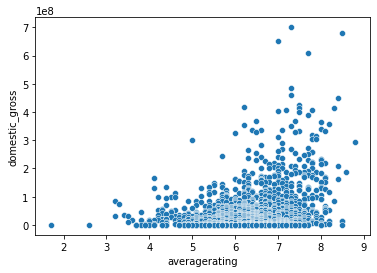

In [70]:
#gathering a rough overview 
y = gross_and_rating_df['domestic_gross']
x = gross_and_rating_df['averagerating']
sea.scatterplot(x, y)

In [75]:
genres_df = gross_and_rating_df['genres']
genres_df = genres_df.str.split(',')
genres_list_all = genres_df.tolist()
genres_dict_all = {}
for x in genres_list_all:
    for y in x:
        if y not in genres_dict_all:
            genres_dict_all[y] = 1
        else:
            genres_dict_all[y] += 1

In [76]:
genres_df = gross_and_rating_df['genres'].iloc[:200]
genres_df = genres_df.str.split(',')
genres_list = genres_df.tolist()
genres_dict = {}
for x in genres_list:
    if y not in genres_dict:
        genres_dict[y] = 1
    else:
        genres_dict[y] += 1

In [79]:
genres_series = pd.Series(genres_dict_all)
genres_series.sort_values(ascending=False, inplace=True)
genres_series

Drama        763
Comedy       562
Action       384
Adventure    319
Thriller     237
Romance      231
Crime        213
Horror       155
Biography    132
Mystery      124
Fantasy      107
Sci-Fi       102
Animation     91
Family        67
History       41
Music         39
Sport         28
War           12
Western       11
Musical        5
dtype: int64